In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

In [5]:
data=pd.read_csv('C:/Users/Admin/Downloads/wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
data_std = scale(data)
data_std

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [9]:
model = PCA()
preds = model.fit_transform(data_std)
var = model.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [10]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

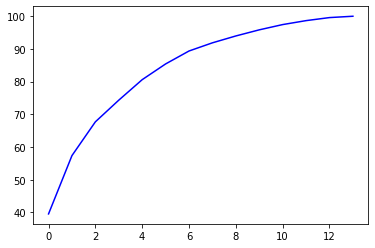

In [12]:
plt.plot(var1,color="blue")

In [13]:
data = pd.concat([pd.DataFrame(preds[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)

In [14]:
data

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


# HIERARCHICAL CLUSTERING

In [15]:
data_norm = normalize(data)
data_norm

array([[-0.92358578, -0.38094983, -0.04320341],
       [-0.77630881,  0.10130931, -0.62215838],
       [-0.88971846, -0.33126444,  0.31410974],
       [-0.81649212, -0.57620674, -0.03641986],
       [-0.53824998, -0.33184736,  0.77470271],
       [-0.8286604 , -0.53683762, -0.15851596],
       [-0.87369213, -0.37455099, -0.31044101],
       [-0.82841913, -0.55783182,  0.05045207],
       [-0.81366523, -0.26872637, -0.51549494],
       [-0.92162284, -0.24416905, -0.30165017],
       [-0.93640089, -0.33409953, -0.10738191],
       [-0.84411429, -0.24526845, -0.47677505],
       [-0.91157551, -0.25365442, -0.3235576 ],
       [-0.91146421, -0.2828859 , -0.29867802],
       [-0.87486134, -0.41567155, -0.24866604],
       [-0.84067919, -0.53697349,  0.07012828],
       [-0.70719636, -0.6659056 ,  0.23757744],
       [-0.77479061, -0.56853467,  0.27652819],
       [-0.82387129, -0.55663566, -0.10673723],
       [-0.9119626 , -0.40544871, -0.06273398],
       [-0.96727515, -0.23076502, -0.105

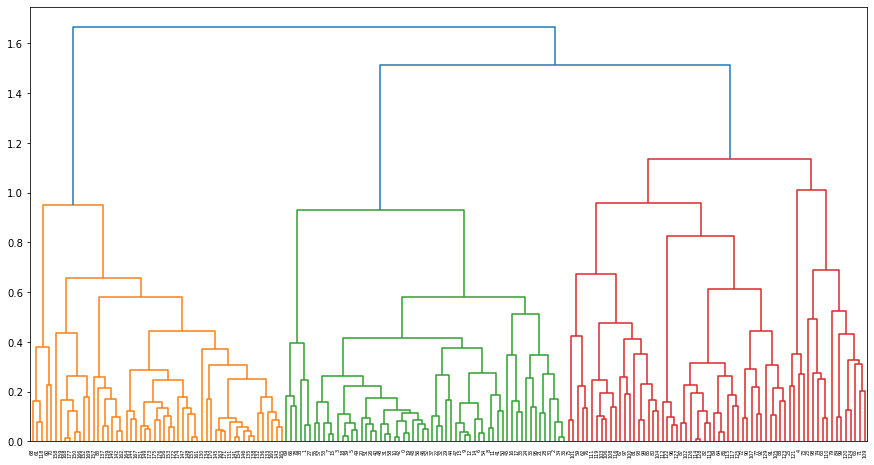

In [16]:
plt.figure(figsize=(15, 8)) 
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

In [18]:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
preds = model.fit_predict(data_norm)
Clusters=pd.DataFrame(preds,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           64
2           60
1           54
dtype: int64

In [19]:
data['Clusters'] = Clusters
data

,pc1,pc2,pc3,Clusters
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,0
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,1
174,2.942729,-1.752263,0.207480,1
175,3.027272,-2.756040,-0.940803,1
176,2.755222,-2.293784,-0.550474,1


# K_MEANS

In [20]:
data_norm

array([[-0.92358578, -0.38094983, -0.04320341],
       [-0.77630881,  0.10130931, -0.62215838],
       [-0.88971846, -0.33126444,  0.31410974],
       [-0.81649212, -0.57620674, -0.03641986],
       [-0.53824998, -0.33184736,  0.77470271],
       [-0.8286604 , -0.53683762, -0.15851596],
       [-0.87369213, -0.37455099, -0.31044101],
       [-0.82841913, -0.55783182,  0.05045207],
       [-0.81366523, -0.26872637, -0.51549494],
       [-0.92162284, -0.24416905, -0.30165017],
       [-0.93640089, -0.33409953, -0.10738191],
       [-0.84411429, -0.24526845, -0.47677505],
       [-0.91157551, -0.25365442, -0.3235576 ],
       [-0.91146421, -0.2828859 , -0.29867802],
       [-0.87486134, -0.41567155, -0.24866604],
       [-0.84067919, -0.53697349,  0.07012828],
       [-0.70719636, -0.6659056 ,  0.23757744],
       [-0.77479061, -0.56853467,  0.27652819],
       [-0.82387129, -0.55663566, -0.10673723],
       [-0.9119626 , -0.40544871, -0.06273398],
       [-0.96727515, -0.23076502, -0.105

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


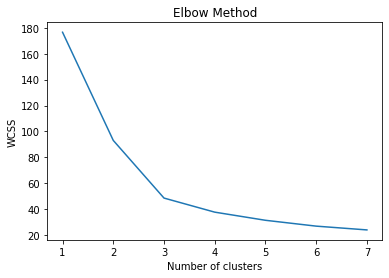

In [21]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
model_km = KMeans(3, random_state=42)
preds_km = model_km.fit_predict(data_norm)
clusters_km = pd.DataFrame(preds_km, columns = ['clusters_km'])
clusters_km.value_counts()

clusters_km
1              65
0              60
2              53
dtype: int64

In [23]:
data['clusters_km'] = clusters_km
data

,pc1,pc2,pc3,Clusters,clusters_km
0,-3.522934,-1.453098,-0.164795,2,1
1,-2.528858,0.330019,-2.026707,2,1
2,-2.785029,-1.036936,0.983238,2,1
3,-3.922588,-2.768210,-0.174968,2,1
4,-1.407511,-0.867773,2.025829,0,1
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,1,2
174,2.942729,-1.752263,0.207480,1,2
175,3.027272,-2.756040,-0.940803,1,2
176,2.755222,-2.293784,-0.550474,1,2


In [ ]:
PCA
firstly i am loaded the data and after that data converted into standarized form and then build the PCA model and fitting  the data to model by keep the no. of componets is defaultAnd i got principal components(pc) then as you said taken three pc values and i  created a data frame and named them. And finally i got 67.71% of the data by taking three principal components.
HIERARCHICAL CLISTERING
in this hierarchical clustering data principle component is converted into normalize form and then created dendogram daigram by using linkage and average method and build a model with AgglomerativeClustering by giving no. of clusters is 3 and linkage method is average then got three clusters. And three clusters are perfectly created as same as original data.
K MEANS
Now plotted a elbow plot for finding the no. of clusters value and i observed that three clusters are perfect. And started building model with kmeans by giving k=3. got three clusters. And three cluster are perfectly created as same as original data.
